### Import Libraries

In [138]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Original Image

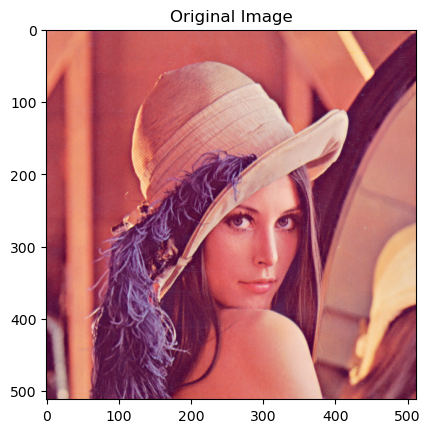

In [139]:
original_image = cv2.imread('Lena.png')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

### Grayscale Image

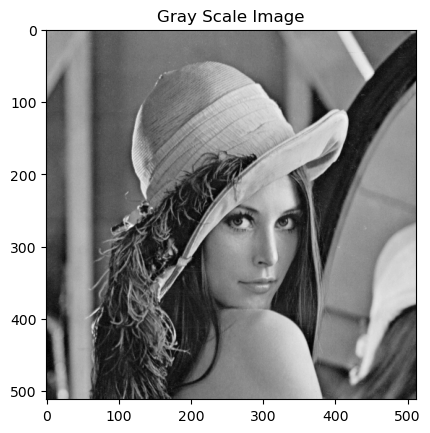

In [140]:
f = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(f, cmap='gray')
plt.title('Gray Scale Image')
plt.show()

### Prewitt Filters

In [141]:
prewitt_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_y = prewitt_x.T

### Convolution

In [142]:
def convolution(f, w):
    f_height, f_width = f.shape
    w_height, w_width = w.shape
    height = w_height // 2
    width = w_width // 2
    g = np.zeros(f.shape)
    for i in range(height, f_height - height):
        for j in range(width, f_width - width):
            g[i, j] = np.sum(f[i-height:i+height+1, j-width:j+width+1] * w)
    return g

In [143]:
df_dx = convolution(f, prewitt_x)
df_dy = convolution(f, prewitt_y)

In [144]:
print(df_dy)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   3. ...  48. 126.   0.]
 [  0.   0.   3. ...  48. 126.   0.]
 ...
 [  0. -22. -15. ...  -3.   8.   0.]
 [  0. -29. -18. ... -10.  -2.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


### Gradient

In [145]:
gradient = np.sqrt(df_dx**2 + df_dy**2)

### Thresholding

In [146]:
e = np.zeros(f.shape)
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        if abs(gradient[i, j]) > 60:
            e[i, j] = 1
        else:
            e[i, j] = 0

### Sharpening

[]

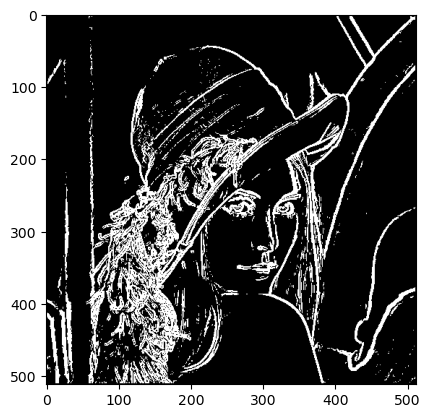

In [147]:
# Edge Image
plt.imshow(e, cmap='gray')
plt.plot()

Text(0.5, 1.0, 'Sharpened Image')

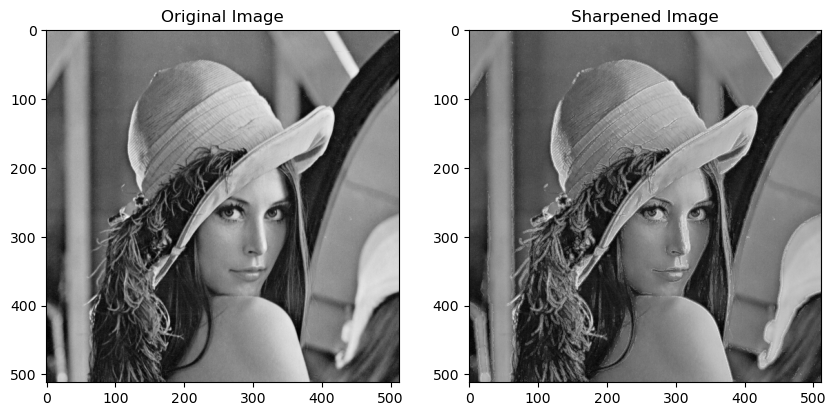

In [148]:
final_image = f + 30 * e
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(final_image, cmap='gray')
ax[1].set_title('Sharpened Image')